<a href="https://colab.research.google.com/github/mattsmiths/SICBCV2025/blob/main/simpleImageClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [ ]:
# Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [ ]:
!pip install bing_image_downloader

In [ ]:
from bing_image_downloader import downloader
downloader.download('hat', limit=75,  output_dir='dataset', force_replace=False, timeout=60)

In [ ]:
from bing_image_downloader import downloader
downloader.download('bat', limit=75,  output_dir='dataset', force_replace=False, timeout=60)

In [ ]:
import glob
import cv2 as cv
import numpy as np
getHats = glob.glob('/content/dataset/bat/*')
getBats = glob.glob('/content/dataset/hat/*')

sizeCH = 64

test = np.zeros((1,sizeCH,sizeCH,3))
key1 = np.zeros((1,1))
for ele in getHats:
  in1 = cv.imread(ele)
  in1 = np.expand_dims(cv.resize(in1,(sizeCH,sizeCH)),0)/255
  test = np.concatenate((test,in1),0)
  key1 = np.concatenate((key1,np.zeros((1,1))),0)
test = np.delete(test,0,0)

for ele in getBats:
  in1 = cv.imread(ele)
  in1 = np.expand_dims(cv.resize(in1,(sizeCH,sizeCH)),0)/255
  test = np.concatenate((test,in1),0)
  key1 = np.concatenate((key1,np.ones((1,1))),0)

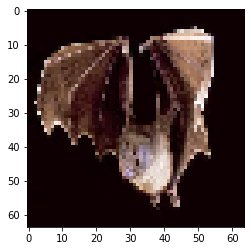

In [ ]:
plt.imshow(test[5])

In [ ]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [ ]:
out= np.arange(0,len(test))
np.random.shuffle(out)

trainInd = out[:np.int(len(out)*.80)]
valInd = out[np.int(len(out)*.80):]

train_images = test[trainInd]
train_labels = key1[trainInd]

test_images = test[valInd]
test_labels = key1[valInd]

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))

In [ ]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_19 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_20 (Conv2D)          (None, 12, 12, 64)        36928     
                                                                 
 flatten_8 (Flatten)         (None, 9216)             

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_images, train_labels, epochs=15,
                    validation_data=(test_images, test_labels))

Epoch 1/15
4/4 [==============================] - 2s 271ms/step - loss: 0.8124 - accuracy: 0.5234 - val_loss: 0.7176 - val_accuracy: 0.5000
Epoch 2/15
4/4 [==============================] - 1s 239ms/step - loss: 0.6258 - accuracy: 0.7031 - val_loss: 0.6801 - val_accuracy: 0.5938
Epoch 3/15
4/4 [==============================] - 1s 239ms/step - loss: 0.5670 - accuracy: 0.7188 - val_loss: 0.5384 - val_accuracy: 0.7500
Epoch 4/15
4/4 [==============================] - 1s 237ms/step - loss: 0.4286 - accuracy: 0.7969 - val_loss: 0.5304 - val_accuracy: 0.7188
Epoch 5/15
4/4 [==============================] - 1s 234ms/step - loss: 0.3612 - accuracy: 0.8125 - val_loss: 0.4865 - val_accuracy: 0.7500
Epoch 6/15
4/4 [==============================] - 1s 230ms/step - loss: 0.3288 - accuracy: 0.8516 - val_loss: 0.5970 - val_accuracy: 0.7500
Epoch 7/15
4/4 [==============================] - 1s 239ms/step - loss: 0.3048 - accuracy: 0.8672 - val_loss: 0.4364 - val_accuracy: 0.7500
Epoch 8/15
4/4 [====

1/1 - 0s - loss: 0.5174 - accuracy: 0.8750 - 65ms/epoch - 65ms/step


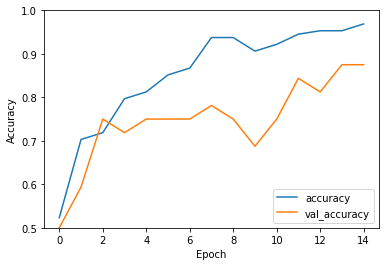

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

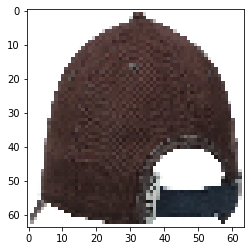

In [ ]:
plt.imshow(test[85])

In [ ]:
out = model.predict(np.expand_dims(test[85],0))
print(out)

[[-4.467807  7.259677]]
